In [53]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings



# **1. Data Cleaning and Exploration:**


*   **Clean the data:** Identify and handle missing values, inconsistencies,and outliers.
*   **Explore the data:** Analyze the distribution of house prices and other
features. Identify potential relationships between features and price
using visualizations (scatter plots, box plots, etc.).







In [2]:
# importing file from local drive
uploaded = files.upload()

Saving zameen-updated.csv to zameen-updated.csv


## ***Clean Data***

In [3]:
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# Read the file into a DataFrame
df = pd.read_csv(fn)

User uploaded file "zameen-updated.csv" with length 25708132 bytes


In [81]:
df.shape

(89120, 20)

In [4]:
print(df.columns)

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')


In [5]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89120 entries, 0 to 89119
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    89120 non-null  int64  
 1   location_id    89120 non-null  int64  
 2   page_url       89120 non-null  object 
 3   property_type  89120 non-null  object 
 4   price          89120 non-null  int64  
 5   location       89120 non-null  object 
 6   city           89120 non-null  object 
 7   province_name  89120 non-null  object 
 8   latitude       89120 non-null  float64
 9   longitude      89120 non-null  float64
 10  baths          89120 non-null  int64  
 11  area           89120 non-null  object 
 12  purpose        89120 non-null  object 
 13  bedrooms       89120 non-null  int64  
 14  date_added     89120 non-null  object 
 15  agency         63321 non-null  object 
 16  agent          63320 non-null  object 
 17  Area Type      89120 non-null  object 
 18  Area S

In [6]:
# changing Date Data tye
df['date_added'] = pd.to_datetime(df['date_added'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89120 entries, 0 to 89119
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   property_id    89120 non-null  int64         
 1   location_id    89120 non-null  int64         
 2   page_url       89120 non-null  object        
 3   property_type  89120 non-null  object        
 4   price          89120 non-null  int64         
 5   location       89120 non-null  object        
 6   city           89120 non-null  object        
 7   province_name  89120 non-null  object        
 8   latitude       89120 non-null  float64       
 9   longitude      89120 non-null  float64       
 10  baths          89120 non-null  int64         
 11  area           89120 non-null  object        
 12  purpose        89120 non-null  object        
 13  bedrooms       89120 non-null  int64         
 14  date_added     89120 non-null  datetime64[ns]
 15  agency         6332

In [8]:
# checking dubplicate values from dataframe
dup_rows = df[df.duplicated()]
len(dup_rows)

0

In [9]:
# missing values
df.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           25799
agent            25800
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [10]:
#  these cols have missing values
data = df[['agency', 'agent']]
data

,agency,agent
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director
4,NaN,NaN
...,...,...
89115,Taloo Associates,Salman
89116,ZPN Real Estate & Builders,Muhammad Asif
89117,ZPN Real Estate & Builders,Fahad Awan
89118,Taloo Associates,Salman


In [11]:
# treating missing values
df['agency'] = df['agency'].fillna('null')
df['agent'] = df['agent'].fillna('null')
df.sample(5)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
51734,16655220,3233,https://www.zameen.com/Property/e_11_e_11_2_1s...,Flat,8500000,E-11,Islamabad,Islamabad Capital,33.699958,72.970119,2,3.3 Marla,For Sale,2,2019-06-12,Real Cottage,Zafar Bhatti - BULAN,Marla,3.3,0-5 Marla
27954,15240831,1483,https://www.zameen.com/Property/d_h_a_dha_phas...,House,72500000,DHA Defence,Karachi,Sindh,24.805045,67.064323,6,1 Kanal,For Sale,5,2019-03-10,MIK Associates,Najeeb Ashfaq,Kanal,1.0,1-5 Kanal
29250,15361480,339,https://www.zameen.com/Property/dha_defence_dh...,Upper Portion,40000,DHA Defence,Islamabad,Islamabad Capital,33.527944,73.161392,0,1 Kanal,For Rent,3,2019-04-05,Reliance Property Hub,M. Rehan Baig,Kanal,1.0,1-5 Kanal
8153,11902446,9592,https://www.zameen.com/Property/malir_pak_kaus...,House,6200000,Malir,Karachi,Sindh,24.906942,67.207573,3,3.2 Marla,For Sale,5,2019-04-06,null,null,Marla,3.2,0-5 Marla
1265,8256508,587,https://www.zameen.com/Property/rawalpindi_kha...,House,9000000,Khayaban-e-Sir Syed,Rawalpindi,Punjab,33.638847,73.048089,2,3 Marla,For Sale,4,2019-07-04,null,null,Marla,3.0,0-5 Marla


In [12]:
#  rename Area Type , Area Size and Area Category Col

df.rename(columns={'Area Type': 'area_type', 'Area Size': 'area_size', 'Area Category': 'area_category'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89120 entries, 0 to 89119
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   property_id    89120 non-null  int64         
 1   location_id    89120 non-null  int64         
 2   page_url       89120 non-null  object        
 3   property_type  89120 non-null  object        
 4   price          89120 non-null  int64         
 5   location       89120 non-null  object        
 6   city           89120 non-null  object        
 7   province_name  89120 non-null  object        
 8   latitude       89120 non-null  float64       
 9   longitude      89120 non-null  float64       
 10  baths          89120 non-null  int64         
 11  area           89120 non-null  object        
 12  purpose        89120 non-null  object        
 13  bedrooms       89120 non-null  int64         
 14  date_added     89120 non-null  datetime64[ns]
 15  agency         8912

In [13]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'area_type', 'area_size', 'area_category'],
      dtype='object')

In [14]:
# Ensure data integrity and consistency
# converting all string values to lowercase to remove inconsistency

df['property_type'] = df['property_type'].str.lower()
df['location'] = df['location'].str.lower()
df['city'] =  df['city'].str.lower()
df['agency'] = df['agency'].str.lower()
df['agent'] = df['agent'].str.lower()
df['area_type'] = df['area_type'].str.lower()
df['province_name'] = df['province_name'].str.lower()
df['area_category'] = df['area_category'].str.lower()
df['purpose'] = df['purpose'].str.lower()





In [15]:
#  removing all white spaces in the data frame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [16]:
df1 = df.copy()

In [17]:
# Ensuring all measurements into single unit (e.g Marla)

df1['area'].sample(7)

3006       5 Marla
14326      5 Marla
48077    2.5 Marla
26657      7 Marla
24958      5 Marla
30894     10 Marla
56392      5 Marla
Name: area, dtype: object

In [18]:

# Convert 'area' column to Marla

def convert_to_marla(area_str):
    value, unit = area_str.split()
    # Remove commas before converting to float
    value = float(value.replace(',', ''))
    if unit.lower() == 'kanal':
        return value * 20  # 1 Kanal = 20 Marlas
    return value

df1['area_in_marla'] = df1['area'].apply(convert_to_marla)

print("DataFrame after converting area to Marla:\n", df1)



DataFrame after converting area to Marla:
        property_id  location_id  \
0           237062         3325   
1           346905         3236   
2           656161          340   
3           841645         3226   
4           850762         3390   
...            ...          ...   
89115     17261380          524   
89116     17261386        10014   
89117     17261393        10014   
89118     17261394          253   
89119     17261912         9048   

                                                page_url  property_type  \
0      https://www.zameen.com/Property/g_10_g_10_2_gr...           flat   
1      https://www.zameen.com/Property/e_11_2_service...           flat   
2      https://www.zameen.com/Property/islamabad_bani...          house   
3      https://www.zameen.com/Property/dha_valley_dha...          house   
4      https://www.zameen.com/Property/ghauri_town_gh...          house   
...                                                  ...            ...   
89115  http

# **Handling outliers**

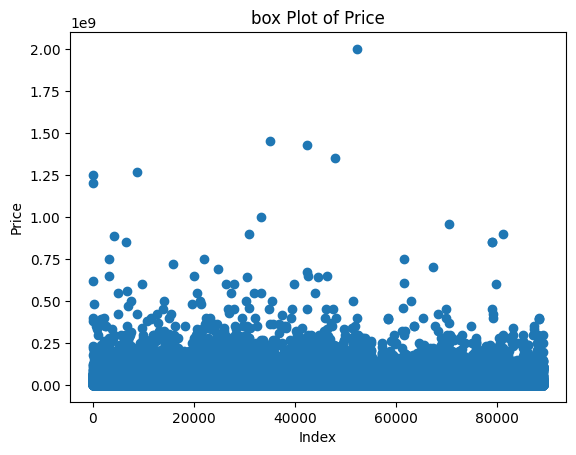

In [19]:
# Scatter Plot of price
plt.scatter(df1.index, df1['price'])
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('box Plot of Price')
plt.show()

In [20]:
# find outliers using IQR
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

# Identify outliers in price and Area Size
price_outliers = find_outliers(df['price'])
area_size_outliers = find_outliers(df['area_size'])

print("Price outliers")
print(price_outliers)

print("Area Size outliers")
print(area_size_outliers)

Price outliers
9        400000000
15        88500000
18       100000000
21       220000000
24       230000000
           ...    
89064     53000000
89085     54000000
89091     54000000
89092     54000000
89093     57000000
Name: price, Length: 7464, dtype: int64
Area Size outliers
18       17.8
30       16.0
46       18.0
65       18.0
206      18.0
         ... 
88924    16.9
89002    16.7
89003    16.7
89004    16.7
89038    16.0
Name: area_size, Length: 1691, dtype: float64


In [21]:
# Removing outliers from dataset
df1 = df1[~df1['price'].isin(price_outliers)]
df1 = df1[~df1['area_size'].isin(area_size_outliers)]

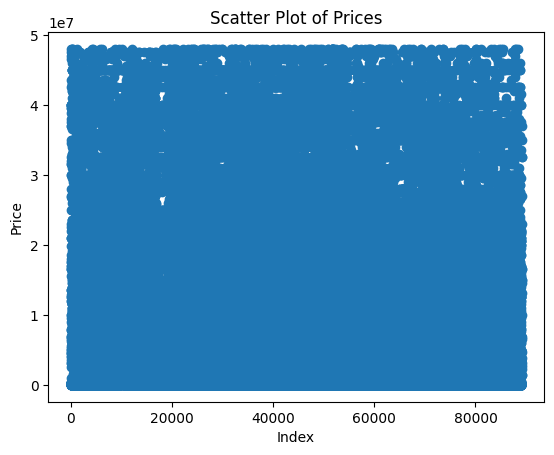

In [22]:
# Scatter Plot without outliers
plt.scatter(df1.index, df1['price'])
plt.title('Scatter Plot of Prices')
plt.ylabel('Price')
plt.xlabel('Index')
plt.show()

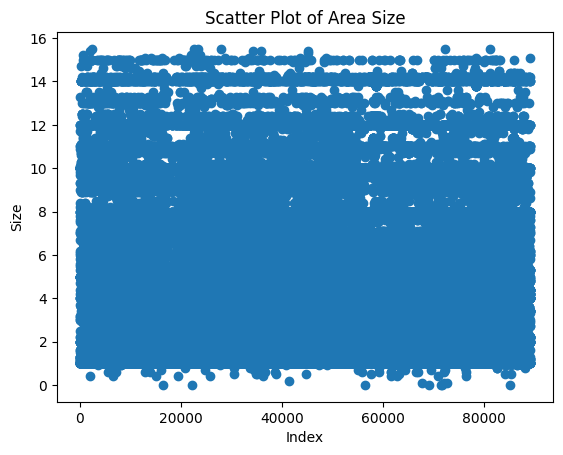

In [23]:
plt.scatter(df1.index, df1['area_size'])
plt.title('Scatter Plot of Area Size')
plt.ylabel('Size')
plt.xlabel('Index')
plt.show()

# **Exploring Data**

In [24]:
print(df1.columns)

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'area_type', 'area_size', 'area_category', 'area_in_marla'],
      dtype='object')


**Distribution of house prices and other features:**

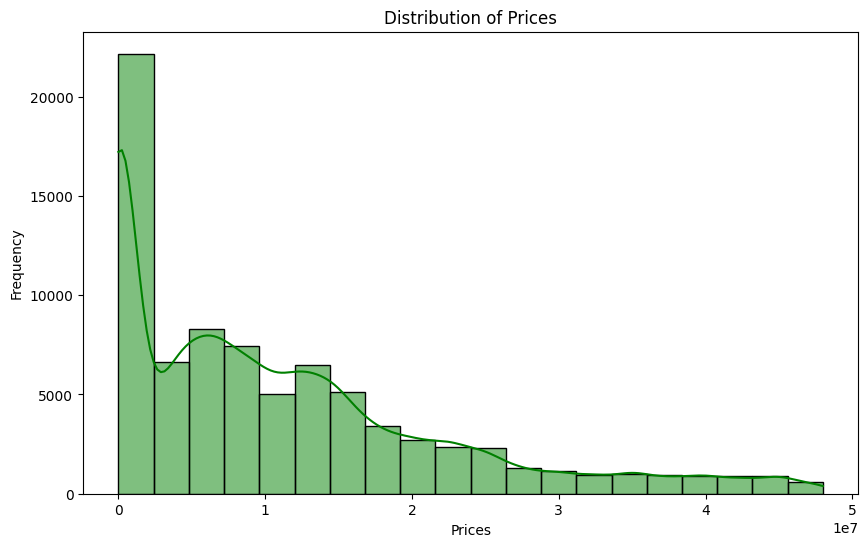

In [25]:
# checking the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=20, kde=True ,color='green')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

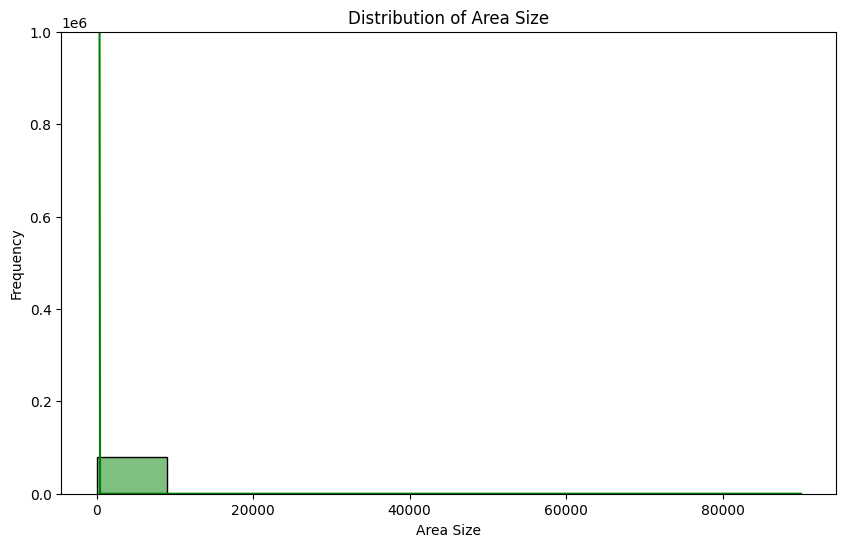

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['area_in_marla'], bins=10 , kde=True ,color='green')
plt.ylim(0, 1000000)

plt.xlabel('Area Size')
plt.ylabel('Frequency')
plt.title('Distribution of Area Size')
plt.show()

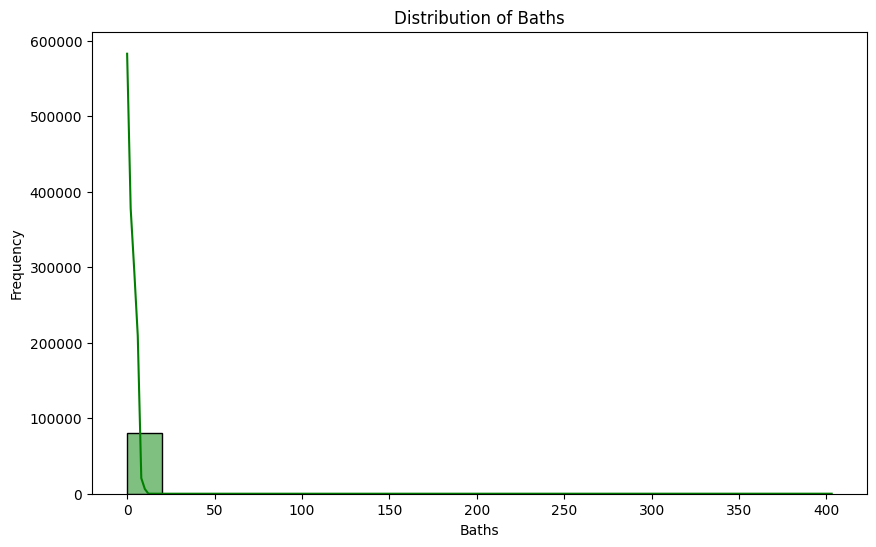

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['baths'], bins=20 , kde=True ,color='green')
plt.xlabel('Baths')
plt.ylabel('Frequency')
plt.title('Distribution of Baths')
plt.show()

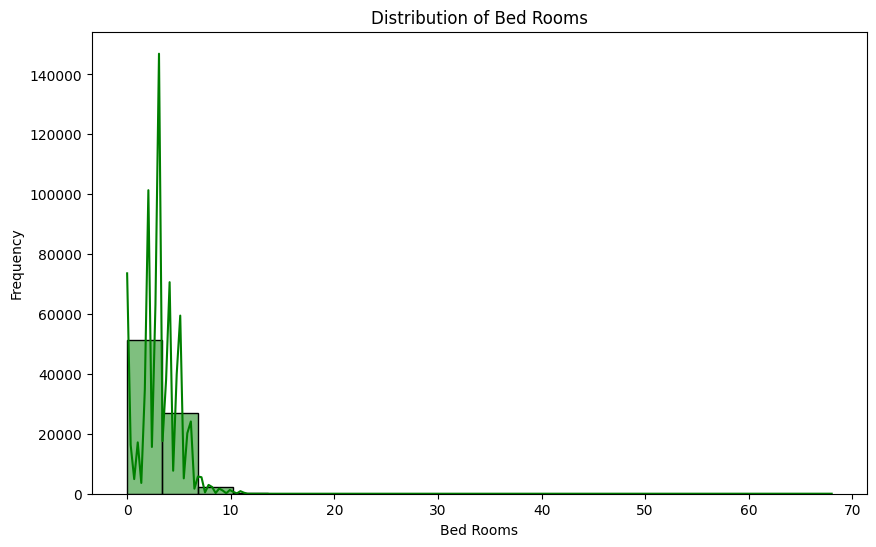

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['bedrooms'], bins=20 , kde=True ,color='green')
plt.xlabel('Bed Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bed Rooms')
plt.show()

 **relationships between features and price
using visualizations**

In [29]:
data = df1[['area_in_marla' ,'price', 'location']]
print(data)

       area_in_marla     price               location
0                4.0  10000000                   g-10
1                5.6   6900000                   e-11
2               40.0  43500000              bani gala
3                8.0   7000000            dha defence
4               32.0  34500000            ghauri town
...              ...       ...                    ...
89115            7.3  16500000   gulshan-e-iqbal town
89116            2.7   1480000    bahria town karachi
89117            2.7   1460000    bahria town karachi
89118           10.9  37000000  khalid bin walid road
89119            4.8   6800000          north karachi

[80535 rows x 3 columns]


Text(0, 0.5, 'Price')

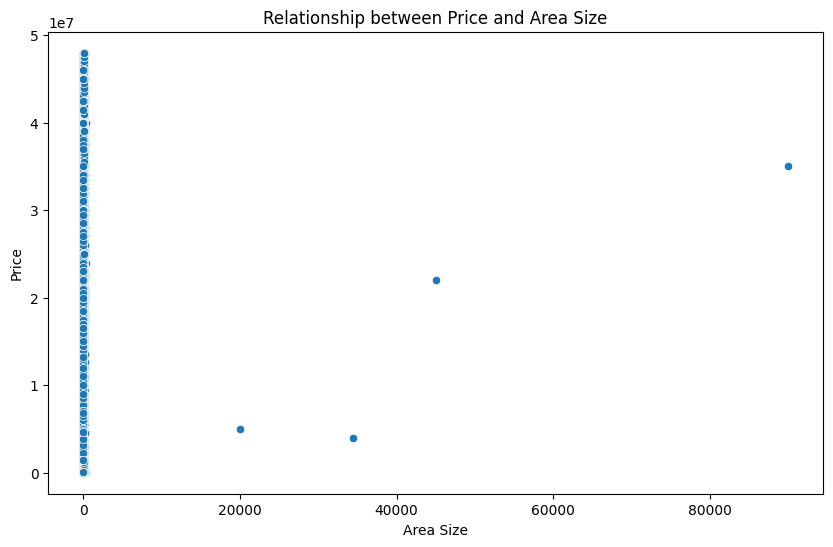

In [30]:
# Relationship between Price and Area Size

plt.figure(figsize=(10, 6))
sns.scatterplot(x='area_in_marla', y='price', data=df1)
plt.title('Relationship between Price and Area Size')
plt.xlabel('Area Size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

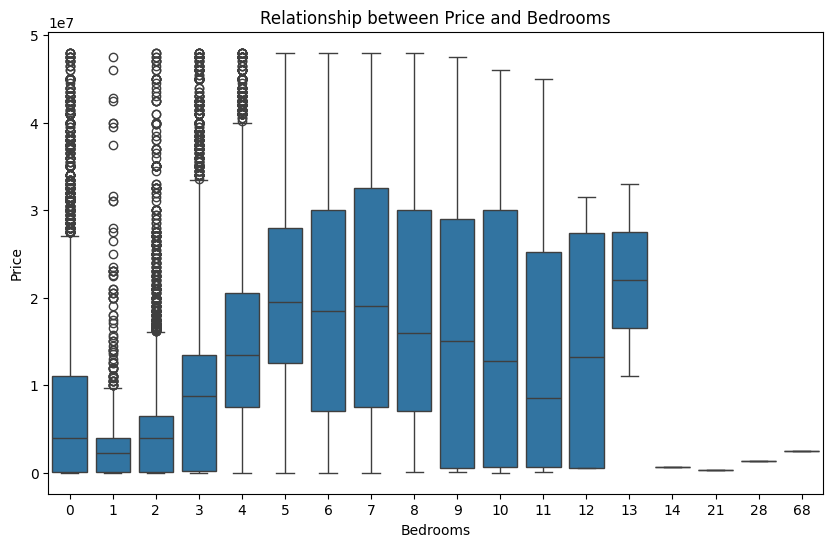

In [31]:
# Relationship between Price and Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df1)
plt.title('Relationship between Price and Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

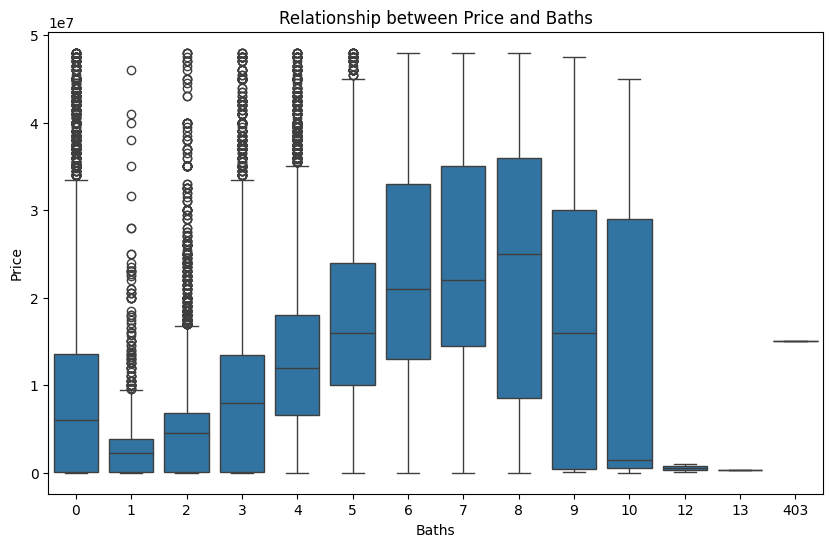

In [32]:
# Relationship between Price and Baths
plt.figure(figsize=(10, 6))
sns.boxplot(x='baths', y='price', data=df1)
plt.title('Relationship between Price and Baths')
plt.xlabel('Baths')
plt.ylabel('Price')

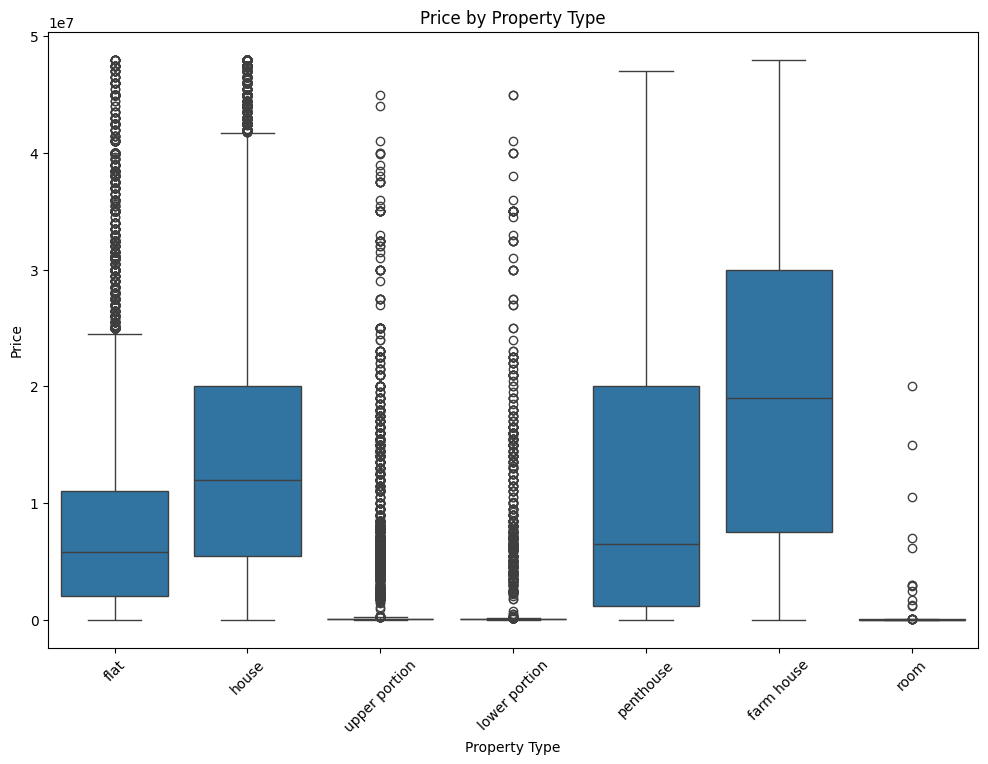

In [33]:
#  Relationship Between Price and Property Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price', data=df1)
plt.title('Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# **Feature Engineering**

**New features**

In [34]:
# creating new features

df1['price_per_unit_area'] = df1['price'] / df1['area_in_marla']
df1['total_rooms'] = df1['bedrooms'] + df1['baths']
print('Price per Unit area:')
print(df1['price_per_unit_area'])
print('total rooms:')
print(df1['total_rooms'])

Price per Unit area:
0        2.500000e+06
1        1.232143e+06
2        1.087500e+06
3        8.750000e+05
4        1.078125e+06
             ...     
89115    2.260274e+06
89116    5.481481e+05
89117    5.407407e+05
89118    3.394495e+06
89119    1.416667e+06
Name: price_per_unit_area, Length: 80535, dtype: float64
total rooms:
0         4
1         6
2         8
3         6
4        16
         ..
89115     6
89116     2
89117     2
89118     9
89119     4
Name: total_rooms, Length: 80535, dtype: int64



**Consider encoding categorical features (e.g., location) into numerical
values suitable for modeling.**

In [35]:
# categorical_features = 'location',  'city', 'province_name', 'purpose'

label_encoder = LabelEncoder()
# Encode categorical features
df1['location_encoded'] = label_encoder.fit_transform(df1['location'])
df1['city_encoded'] = label_encoder.fit_transform(df1['city'])
df1['province_name_encoded'] = label_encoder.fit_transform(df1['province_name'])
df1['purpose_encoded'] = label_encoder.fit_transform(df1['purpose'])
df1['property_type_encoded'] = label_encoder.fit_transform(df1['property_type'])
df1[['location_encoded',  'city_encoded', 'province_name_encoded', 'purpose_encoded' , 'property_type_encoded']]

,location_encoded,city_encoded,province_name_encoded,purpose_encoded,property_type_encoded
0,424,1,0,1,1
1,359,1,0,1,1
2,185,1,0,1,2
3,321,1,0,1,2
4,451,1,0,1,2
...,...,...,...,...,...
89115,513,2,2,1,1
89116,176,2,2,1,1
89117,176,2,2,1,1
89118,683,2,2,1,1



# **Outlier Analysis:**

 **Identify houses with significantly higher or lower prices compared to
similar properties**

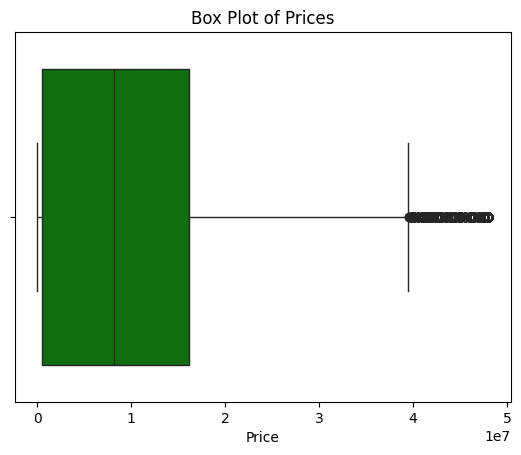

In [36]:
# identifying prices outliers

sns.boxplot(x='price', data=df1, color='green')
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.show()

In [37]:
# Outliers of Houses  significantly with higher or lower prices compared to similar properties

# using z score method

# Calculate Z-scores for 'price'
price_zscore = zscore(df1['price'])
# setting threshold > 3
price_outliers = df1[abs(price_zscore) > 3]
price_outliers[['property_id', 'price', 'location', 'baths', 'bedrooms', 'area_in_marla', 'property_type']]

,property_id,price,location,baths,bedrooms,area_in_marla,property_type
8,1586658,48000000,diplomatic enclave,2,2,7.8,flat
16,2682075,47000000,diplomatic enclave,2,3,8.4,flat
63,3463063,47500000,eme society,0,0,20.0,house
116,4015520,46500000,g-13,9,9,10.9,house
222,6132587,48000000,diplomatic enclave,2,3,11.1,flat
...,...,...,...,...,...,...,...
87866,17254597,48000000,dha defence,6,5,20.0,house
87955,17254854,48000000,dha defence,8,6,20.0,house
88411,17258956,48000000,dha defence,6,5,20.0,house
88414,17259053,46000000,dha defence,6,5,20.0,house


In [38]:
is_outlier = price_outliers[['property_id', 'price', 'location', 'baths', 'bedrooms', 'area_in_marla', 'property_type']]

non_outlier = df1[~df1['property_id'].isin(price_outliers['property_id'])]
is_outlier


,property_id,price,location,baths,bedrooms,area_in_marla,property_type
8,1586658,48000000,diplomatic enclave,2,2,7.8,flat
16,2682075,47000000,diplomatic enclave,2,3,8.4,flat
63,3463063,47500000,eme society,0,0,20.0,house
116,4015520,46500000,g-13,9,9,10.9,house
222,6132587,48000000,diplomatic enclave,2,3,11.1,flat
...,...,...,...,...,...,...,...
87866,17254597,48000000,dha defence,6,5,20.0,house
87955,17254854,48000000,dha defence,8,6,20.0,house
88411,17258956,48000000,dha defence,6,5,20.0,house
88414,17259053,46000000,dha defence,6,5,20.0,house


In [39]:
non_outlier

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,area_size,area_category,area_in_marla,price_per_unit_area,total_rooms,location_encoded,city_encoded,province_name_encoded,purpose_encoded,property_type_encoded
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,flat,10000000,g-10,islamabad,islamabad capital,33.679890,73.012640,...,4.0,0-5 marla,4.0,2.500000e+06,4,424,1,0,1,1
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,flat,6900000,e-11,islamabad,islamabad capital,33.700993,72.971492,...,5.6,5-10 marla,5.6,1.232143e+06,6,359,1,0,1,1
2,656161,340,https://www.zameen.com/Property/islamabad_bani...,house,43500000,bani gala,islamabad,islamabad capital,33.707573,73.151199,...,2.0,1-5 kanal,40.0,1.087500e+06,8,185,1,0,1,2
3,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,house,7000000,dha defence,islamabad,islamabad capital,33.492591,73.301339,...,8.0,5-10 marla,8.0,8.750000e+05,6,321,1,0,1,2
4,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,house,34500000,ghauri town,islamabad,islamabad capital,33.623947,73.126588,...,1.6,1-5 kanal,32.0,1.078125e+06,16,451,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89115,17261380,524,https://www.zameen.com/Property/gulshan_e_iqba...,flat,16500000,gulshan-e-iqbal town,karachi,sindh,24.882174,67.067306,...,7.3,5-10 marla,7.3,2.260274e+06,6,513,2,2,1,1
89116,17261386,10014,https://www.zameen.com/Property/bahria_town_ka...,flat,1480000,bahria town karachi,karachi,sindh,25.037705,67.306259,...,2.7,0-5 marla,2.7,5.481481e+05,2,176,2,2,1,1
89117,17261393,10014,https://www.zameen.com/Property/bahria_town_ka...,flat,1460000,bahria town karachi,karachi,sindh,25.037705,67.306259,...,2.7,0-5 marla,2.7,5.407407e+05,2,176,2,2,1,1
89118,17261394,253,https://www.zameen.com/Property/karachi_khalid...,flat,37000000,khalid bin walid road,karachi,sindh,24.874922,67.057322,...,10.9,10-15 marla,10.9,3.394495e+06,9,683,2,2,1,1


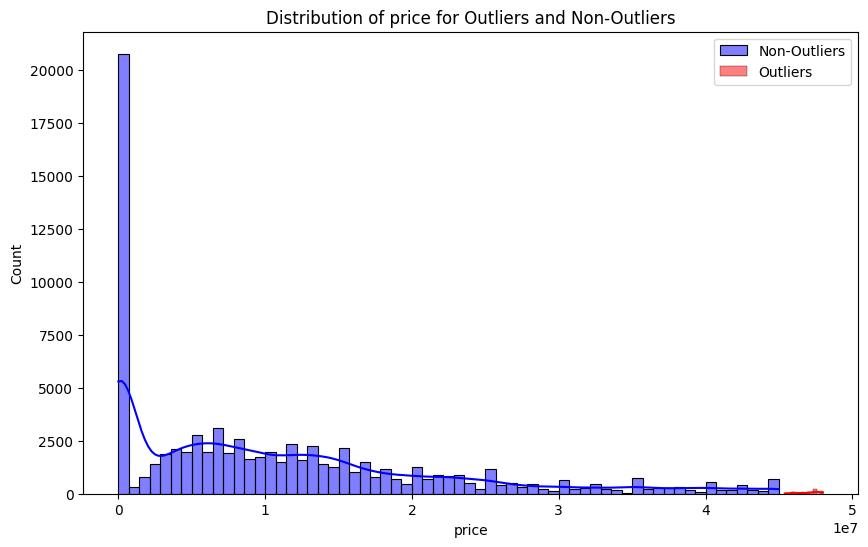

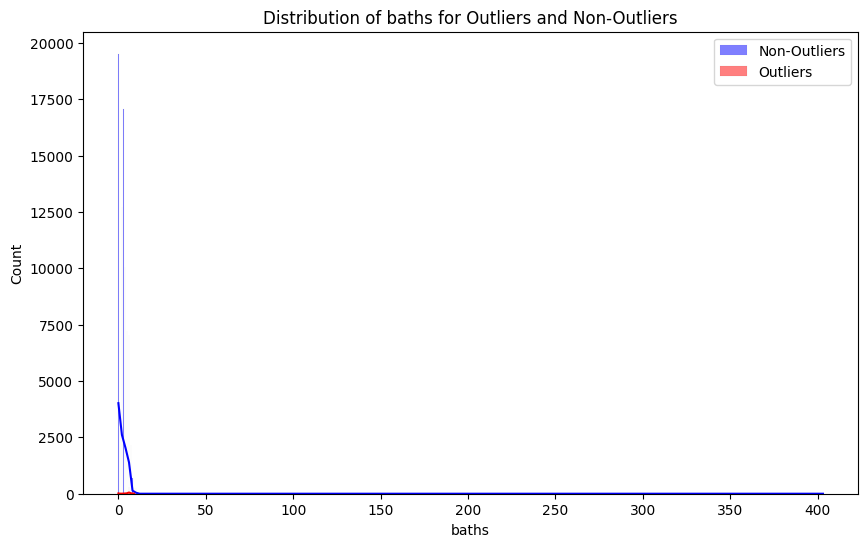

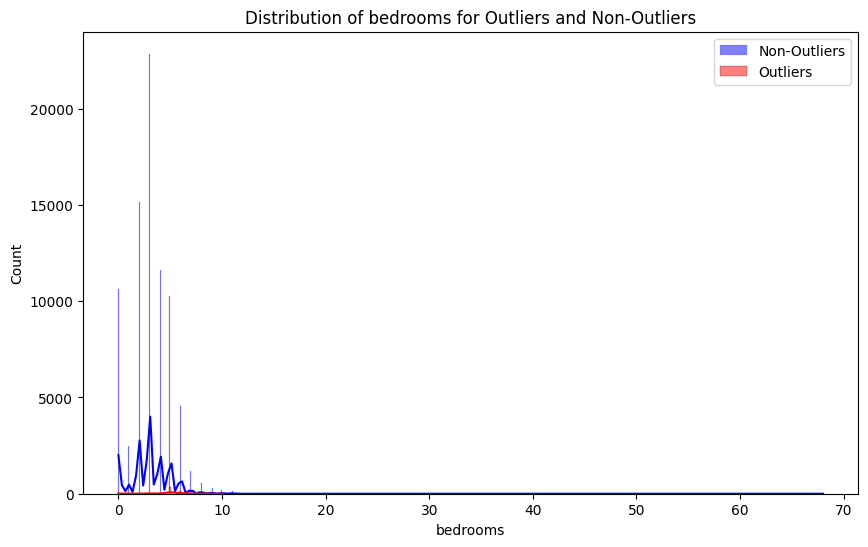

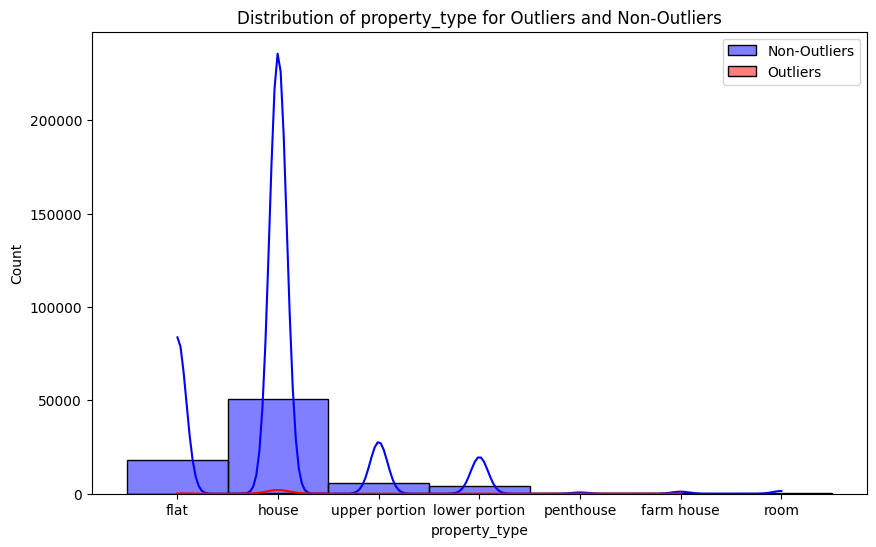

In [40]:
# Plotting distributions of key features
features_to_analyze = ['price', 'baths', 'bedrooms', 'property_type']

for feature in features_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.histplot(non_outlier[feature], color='blue', label='Non-Outliers', kde=True)
    sns.histplot(is_outlier[feature], color='red', label='Outliers', kde=True)
    plt.title(f'Distribution of {feature} for Outliers and Non-Outliers')
    plt.legend()
    plt.show()

In [41]:
df1.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,area_size,area_category,area_in_marla,price_per_unit_area,total_rooms,location_encoded,city_encoded,province_name_encoded,purpose_encoded,property_type_encoded
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,flat,10000000,g-10,islamabad,islamabad capital,33.679890,73.012640,...,4.0,0-5 marla,4.0,2.500000e+06,4,424,1,0,1,1
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,flat,6900000,e-11,islamabad,islamabad capital,33.700993,72.971492,...,5.6,5-10 marla,5.6,1.232143e+06,6,359,1,0,1,1
2,656161,340,https://www.zameen.com/Property/islamabad_bani...,house,43500000,bani gala,islamabad,islamabad capital,33.707573,73.151199,...,2.0,1-5 kanal,40.0,1.087500e+06,8,185,1,0,1,2
3,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,house,7000000,dha defence,islamabad,islamabad capital,33.492591,73.301339,...,8.0,5-10 marla,8.0,8.750000e+05,6,321,1,0,1,2
4,850762,3390,https://www.zameen.com/Property/ghauri_town_gh...,house,34500000,ghauri town,islamabad,islamabad capital,33.623947,73.126588,...,1.6,1-5 kanal,32.0,1.078125e+06,16,451,1,0,1,2


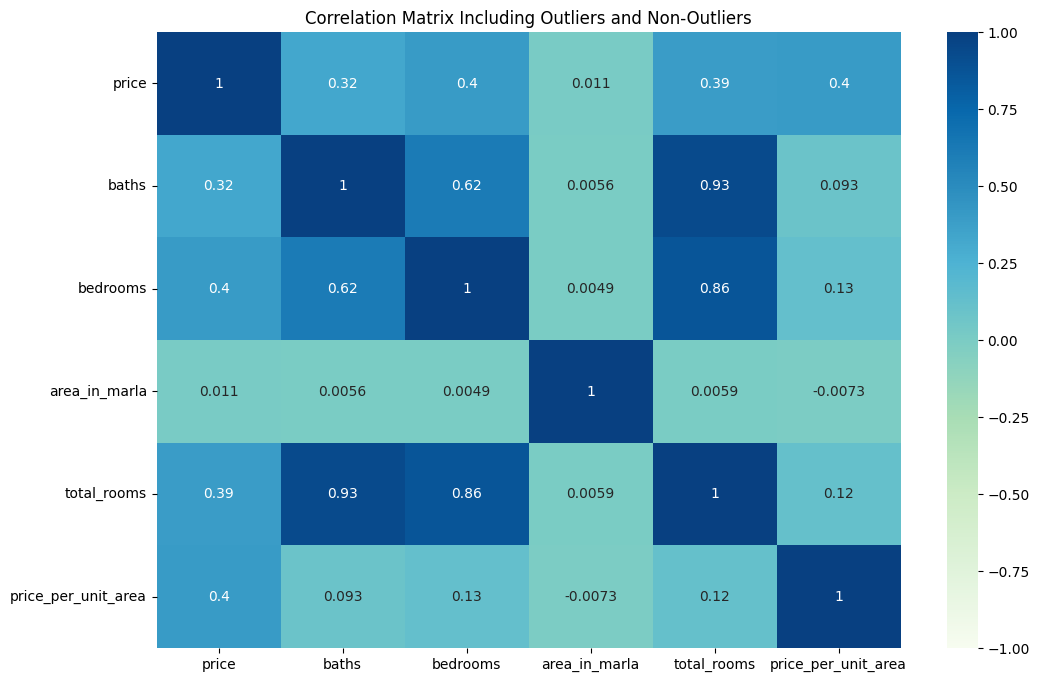

In [42]:
# correlation matrix for the entire dataset including the outlier flag
correlation_matrix = df1[['price', 'baths', 'bedrooms', 'area_in_marla', 'total_rooms', 'price_per_unit_area']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Including Outliers and Non-Outliers')
plt.show()

# . **Predictive Modeling**

 **Train a machine learning model to predict house prices based on the
available features. Popular choices for this task include linear
regression, random forest, or gradient boosting.**

In [43]:
df1.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'area_type', 'area_size', 'area_category', 'area_in_marla',
       'price_per_unit_area', 'total_rooms', 'location_encoded',
       'city_encoded', 'province_name_encoded', 'purpose_encoded',
       'property_type_encoded'],
      dtype='object')

In [44]:
# Define independent variables (X) and defendent variable (y)
X = df1[[ 'area_in_marla','baths', 'bedrooms','total_rooms', 'price_per_unit_area', 'location_encoded', 'purpose_encoded'  ,'city_encoded',
          'province_name_encoded', 'property_type_encoded']]
y = df1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [45]:
missing_X_train = X_train.isnull().sum()
missing_X_test = X_test.isnull().sum()

print("Missing values in X_train:")
print(missing_X_train)

print("\nMissing values in X_test:")
print(missing_X_test)

Missing values in X_train:
area_in_marla            0
baths                    0
bedrooms                 0
total_rooms              0
price_per_unit_area      0
location_encoded         0
purpose_encoded          0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64

Missing values in X_test:
area_in_marla            0
baths                    0
bedrooms                 0
total_rooms              0
price_per_unit_area      0
location_encoded         0
purpose_encoded          0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


model has no missing values

In [47]:
# Impute missing values with the median of each column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

In [46]:
# lets check infinte values

infinite_X_train = np.isinf(X_train).sum()
infinite_X_test = np.isinf(X_test).sum()

print("Infinite values in X_train:")
print(infinite_X_train)

print("\nInfinite values in X_test:")
print(infinite_X_test)

Infinite values in X_train:
area_in_marla            0
baths                    0
bedrooms                 0
total_rooms              0
price_per_unit_area      4
location_encoded         0
purpose_encoded          0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64

Infinite values in X_test:
area_in_marla            0
baths                    0
bedrooms                 0
total_rooms              0
price_per_unit_area      3
location_encoded         0
purpose_encoded          0
city_encoded             0
province_name_encoded    0
property_type_encoded    0
dtype: int64


infinite values found , replacing them with the largest unit price

In [48]:
# imputing infinte values with largest values

X_train = X_train.replace([np.inf, -np.inf], np.nan) # Replace infinite with NaN
X_test = X_test.replace([np.inf, -np.inf], np.nan)


# Impute NaN values by median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [49]:
#  standarizing data for improving the performance and convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# using Linear Regression

filterwarnings('ignore')
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 69267075907476.95
R-squared: 0.46173030226164224


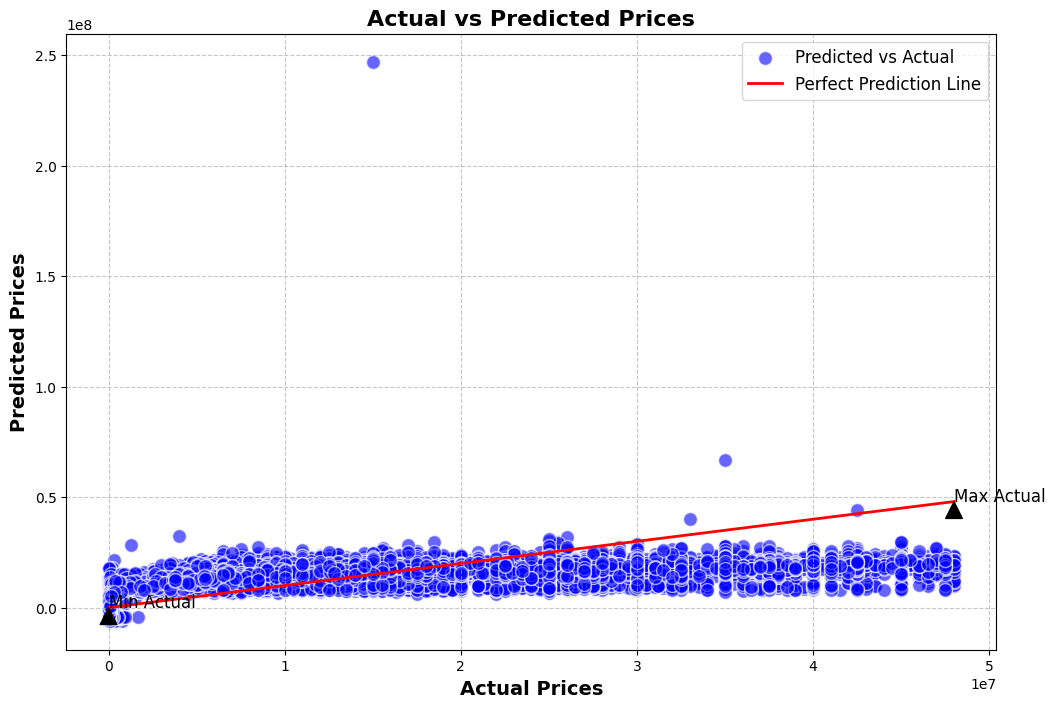

In [63]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

plt.xlabel('Actual Prices', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=14, fontweight='bold')
plt.title('Actual vs Predicted Prices', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)
min_actual = min(y_test)
max_actual = max(y_test)
plt.annotate('Min Actual', xy=(min_actual, min_actual), xytext=(min_actual, min_actual + 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.annotate('Max Actual', xy=(max_actual, max_actual), xytext=(max_actual, max_actual - 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# Show the plot
plt.show()

In [56]:
# Using random Forest
filterwarnings('ignore')

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 114421988781.18144
R-squared: 0.9991108345702634


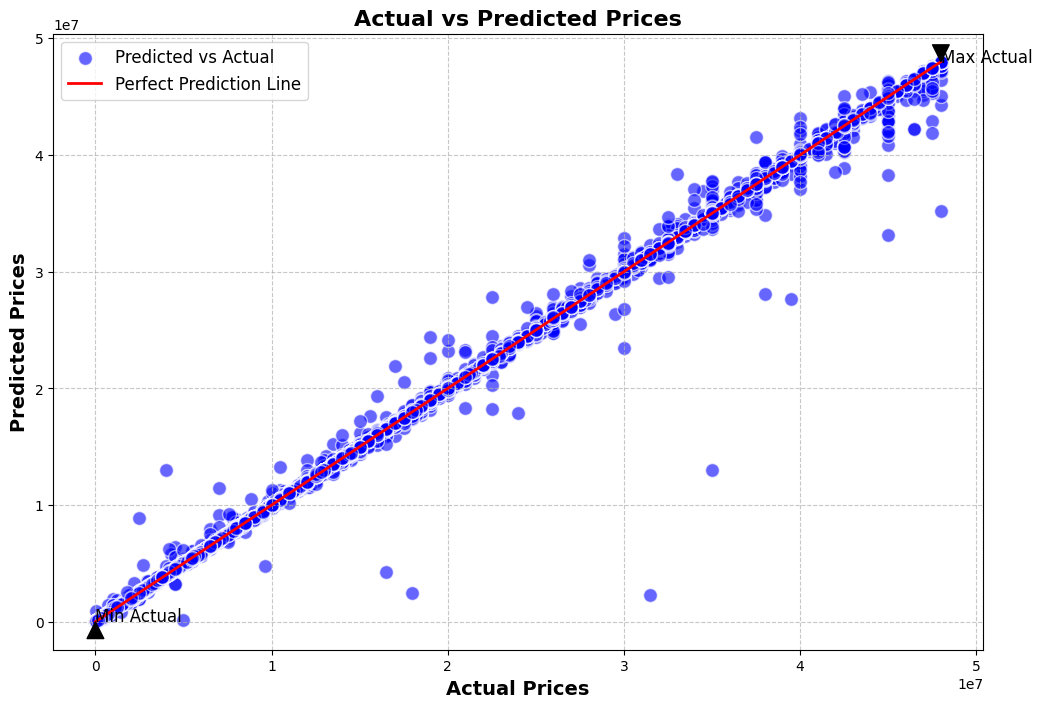

In [57]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, rf_y_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

plt.xlabel('Actual Prices', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=14, fontweight='bold')
plt.title('Actual vs Predicted Prices', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)
min_actual = min(y_test)
max_actual = max(y_test)
plt.annotate('Min Actual', xy=(min_actual, min_actual), xytext=(min_actual, min_actual + 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.annotate('Max Actual', xy=(max_actual, max_actual), xytext=(max_actual, max_actual - 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# Show the plot
plt.show()

In [58]:
# Using gradient boosting.
filterwarnings('ignore')

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


# Train the model on the training data
gb_model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
gb_y_pred = gb_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, gb_y_pred)
r2 = r2_score(y_test, gb_y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 754273938994.2604
R-squared: 0.9941385889351432


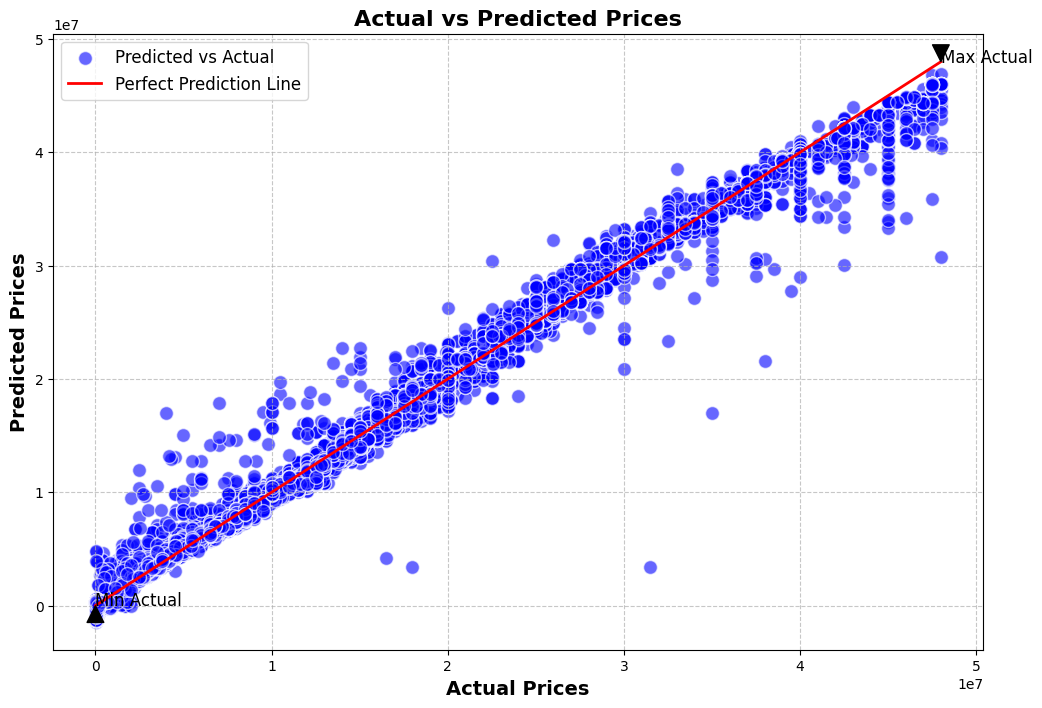

In [59]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, gb_y_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

plt.xlabel('Actual Prices', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=14, fontweight='bold')
plt.title('Actual vs Predicted Prices', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)
min_actual = min(y_test)
max_actual = max(y_test)
plt.annotate('Min Actual', xy=(min_actual, min_actual), xytext=(min_actual, min_actual + 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.annotate('Max Actual', xy=(max_actual, max_actual), xytext=(max_actual, max_actual - 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# Show the plot
plt.show()

# **Future Price Prediction:**

**Use the trained model to predict future house prices based on
hypothetical scenarios (e.g., what would be the price of a house with
specific characteristics in a particular location?).**

In [85]:
# entering hypothetical values for independent variables
new_data = {'area_in_marla' :20.2 ,
            'baths': 2,
            'bedrooms' : 3,
            'total_rooms': 5,
            'price_per_unit_area': 48000,
            'location_encoded': 1,
            'purpose_encoded': 1,
            'city_encoded': 2,
            'province_name_encoded': 0,
            'property_type_encoded': 1}

new_data_df = pd.DataFrame([new_data])

# Scale the new data using the same scaler used during training
new_data_scaled = scaler.transform(new_data_df)

# Predict the price using the trained model
predicted_price = model.predict(new_data_scaled)[0]

print(f"Predicted Price with Linear Regression: {predicted_price}")

Predicted Price with Linear Regression: 13608131.088682957


In [77]:
rf_predicted_price = rf_model.predict(new_data_df)[0]
print(f"Predicted Price with Random Forest: {rf_predicted_price}")

Predicted Price with Random Forest: 824150.0


In [83]:
gb_predicted_price = gb_model.predict(new_data_df)[0]
print(f"Predicted Price with Gradient Boosting: {gb_predicted_price}")

Predicted Price with Gradient Boosting: 86412351.93444811


In [ ]:
new_data_df['predicted_price'] = predicted_price
new_data_df

,baths,bedrooms,total_rooms,price_per_unit_area,location_encoded,purpose_encoded,city_encoded,province_name_encoded,property_type_encoded,predicted_price
0,2,3,5,48000,1,1,2,0,1,1.360548e+07
